In [ ]:
import os
import matplotlib.image as img
import numpy as np
import cv2


def loadimgs(path,n = 0):
    '''
    path => Path of train directory or test directory
    '''
    X=[]
    y=[]
    
    lang_dict = {}
    curr_y = n
    category_images=[]
    
    # we load every alphabet seperately so we can isolate them later
    for filename in os.listdir(path):
        print("loading filename: " + filename)
        lang_dict[filename] = curr_y
        image_path = os.path.join(path, filename)
        image = cv2.imread(image_path)
        image_copy = cv2.resize(image, dsize=(210, 210),interpolation=cv2.INTER_LINEAR)
        category_images.append(image_copy)
        y.append(curr_y)
        curr_y += 1
      
      
      
      # X.append(np.stack(category_images))
    try :
        X.append(np.stack(category_images))
    # edge case  - last one
    except ValueError as e:
        print(e)
        print("error - category_images:", category_images)
    
    
    y = np.vstack(y)
    X = np.stack(X)
    return X,y,lang_dict

# keras functional API

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model, Sequential

# 우선 Sequential 모델을 사용해서 이미지 모델을 정의합니다.
# 다음 모델은 이미지를 벡터로 인코딩합니다.
vision_model = Sequential()
vision_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
vision_model.add(Conv2D(64, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(128, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Flatten())

# 이미지 모델의 출력 텐서를 얻습니다.
image_input = Input(shape=(224, 224, 3))
encoded_image = vision_model(image_input)

# 다음은 질문을 벡터로 인코딩할 언어 모델을 정의합니다
# 질문은 최대 100 단어입니다.
# 각 단어에 1에서 9999까지의 `int` 인덱스를 부여합니다.
question_input = Input(shape=(100,), dtype='int32')
embedded_question = Embedding(input_dim=10000, output_dim=256, input_length=100)(question_input)
encoded_question = LSTM(256)(embedded_question)

# 질문 벡터와 이미지 벡터를 이어붙입니다.
merged = keras.layers.concatenate([encoded_question, encoded_image])

# 그 위에 답이 될 수 있는 1000개의 단어에 대해 로지스틱 회귀를 학습시킵니다.
output = Dense(1000, activation='softmax')(merged)

# 다음은 최종 모델입니다.
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

# 다음 단계에서는 실제 데이터를 이용해 모델을 학습시켜봅시다.

In [ ]:
## model define
concat_model = multi_input_lstm_embedding_model(timesteps, columns_size, max_words, max_len)
concat_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model fit
concat_model.fit([df_label_train, pad_train], target_train,
                 epochs=7, batch_size=32,callbacks=callbacks_list,
                 validation_data=([sequence_test, pad_test], target_test),
                 shuffle=False)	

# model 예시


In [1]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(2, activation="relu")(result)
# 선형 회귀를 위해 activation=linear를 설정
z = Dense(1, activation="linear")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)

ModuleNotFoundError: No module named 'tensorflow'

# Model 구축

In [34]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

In [35]:
class SmallerVGGNet:
    @staticmethod
    def build(width, height, depth, classes, finalAct="sigmoid"):
        # 인풋 이미지의 차원과, 채널에 해당하는 축을 설정하여 모델을 초기화합니다
        # "channels_last"는 채널의 축이 마지막에 오는 것을 의미합니다
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # 만약 "channels_first"를 사용한다면, 인풋 이미지의 차원을
        # 그에 맞게 바꿔줍니다
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            
        # CONV => RELU => POOL
        model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(0.25))

        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # FC => RELU
        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # 단일 라벨 분류는 *softmax* 활성화 함수를 사용합니다
        # 다중 라벨 분류는 *sigmoid* 활성화 함수를 사용합니다
        model.add(Dense(classes))
        model.add(Activation(finalAct))

        # 네트워크 아키텍처를 반환합니다
        return model

In [36]:
# matplotlib의 백엔드를 설정하여 그림이 백그라운드에서 저장될 수 있게합니다
import matplotlib

# 필요한 패키지들을 가져옵니다
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [11]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,
	help="path to input dataset (i.e., directory of images)")
ap.add_argument("-m", "--model", required=True,
	help="path to output model")
ap.add_argument("-l", "--labelbin", required=True,
	help="path to output label binarizer")
ap.add_argument("-p", "--plot", type=str, default="plot.png",
	help="path to output accuracy/loss plot")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -d DATASET -m MODEL -l LABELBIN [-p PLOT]
ipykernel_launcher.py: error: the following arguments are required: -d/--dataset, -m/--model, -l/--labelbin


SystemExit: 2

In [53]:
# 학습을 위해 에폭과 초기 학습률, 배치 사이즈, 그리고 이미지의 차원을 초기화합니다
EPOCHS = 75
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (200, 350, 3)

In [54]:

# args = ap.parse_args()
# 이미지 경로를 섞어줍니다
print("[INFO] loading images...")
imagePaths = sorted(list(paths.list_images('image')))
random.seed(42)
random.shuffle(imagePaths)
 
# 데이터와 라벨을 초기화합니다
data = []
labels = []

[INFO] loading images...


In [22]:
imagePaths

['image\\rectangle_pink\\440.jpg',
 'image\\ellipse_pink\\573.jpg',
 'image\\rectangle_white\\924.jpg',
 'image\\rectangle_yellow\\506.jpg',
 'image\\circle_green\\708.jpg',
 'image\\ellipse_orange\\229.jpg',
 'image\\circle_pink\\614.jpg',
 'image\\rectangle_orange\\33.jpg',
 'image\\circle_white\\960.jpg',
 'image\\ellipse_white\\150.jpg',
 'image\\circle_white\\371.jpg',
 'image\\rectangle_white\\144.jpg',
 'image\\circle_yellow\\794.jpg',
 'image\\rectangle_blue\\151.jpg',
 'image\\rectangle_brown\\63.jpg',
 'image\\ellipse_pink\\173.jpg',
 'image\\rectangle_orange\\711.jpg',
 'image\\circle_orange\\564.jpg',
 'image\\rectangle_green\\90.jpg',
 'image\\circle_white\\88.jpg',
 'image\\diamond_white\\496.jpg',
 'image\\rectangle_purple\\994.jpg',
 'image\\circle_white\\945.jpg',
 'image\\ellipse_brown\\591.jpg',
 'image\\rectangle_blue\\321.jpg',
 'image\\ellipse_gray\\544.jpg',
 'image\\rectangle_blue\\15.jpg',
 'image\\ellipse_white\\718.jpg',
 'image\\circle_white\\988.jpg',
 'ima

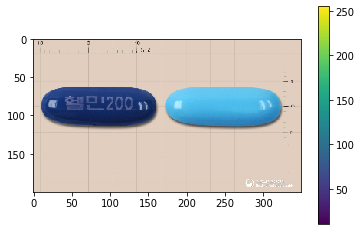

(<matplotlib.image.AxesImage at 0x28d0a95b888>,
 None)

In [55]:
#샘플확인
image = cv2.imread('image\\rectangle_brown\\139.jpg')
image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
plt.imshow(image),plt.colorbar(),plt.show()

In [56]:
for imagePath in imagePaths:
    # 이미지를 로드하고, 전처리한 후 데이터 리스트에 저장합니다
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)

    # 이미지 경로에서 라벨을 추출한 후, 라벨 리스트를 업데이트합니다
    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)

In [57]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [58]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
 
# 나올 수 있는 모든 라벨들을 출력합니다
for (i, label) in enumerate(mlb.classes_):
	print("{}. {}".format(i + 1, label))

1. black
2. blue
3. bluish green
4. brown
5. brown, transparency
6. circle
7. diamond
8. ellipse
9. gray
10. green
11. hexagon
12. octagon
13. orange
14. pentagon
15. pink
16. purple
17. rectangle
18. red
19. tetragon
20. the others
21. triangle
22. white
23. white, transparency
24. wine
25. yellow
26. yellow, transparency
27. yellowish green


In [59]:
# 데이터의 80%를 학습에, 나머지 20%를 테스트에 사용하기 위해
# 데이터를 나누는 과정입니다
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.2, random_state=42)

aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")
 


In [60]:
# 다중 라벨 분류를 수행할 수 있도록 sigmoid 활성화 함수를
# 네트워크의 마지막 레이어로 설정합니다
print("[INFO] compiling model...")
model = SmallerVGGNet.build(
	width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
	depth=IMAGE_DIMS[2], classes=len(mlb.classes_),
	finalAct="sigmoid")

# 옵티마이저를 초기화합니다
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

[INFO] compiling model...


In [ ]:
# 각각의 결과 라벨을 독립적인 베르누이 분포로 취급하기 위해
# 범주형 교차 엔트로피 대신 이진 교차 엔트로피를 사용하여 모델을 컴파일합니다
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
 
# 네트워크를 학습시킵니다
print("[INFO] training network...")
H = model.fit_generator(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS, verbose=1)

[INFO] training network...
Epoch 1/75
14/25 [===============>..............] - ETA: 35s - loss: 0.8681 - accuracy: 0.5518

In [ ]:
# 모델을 디스크에 저장합니다
print("[INFO] serializing network...")
model.save(args["model"])
 
# `MultiLabelBinarizer`를 디스크에 저장합니다
print("[INFO] serializing label binarizer...")
f = open(args["labelbin"], "wb")
f.write(pickle.dumps(mlb))
f.close()

In [ ]:
# 학습 로스와 정확도를 그래프로 그려줍니다
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig(args["plot"])